# Ising Model - Metropolis-Hastings Algorithm

Metropolis-Hastings algorithm a sampling algorithm. It's typically used with systems with large degrees of freedom (i.e. high dimensionality of sampling space). Systems that make direct sampling of probability distrobutions or or have complicated probability distribution functions can make direct sampling difficult and in many cases impossible or impractial.</br>
</br>

The Metropolis-Hastings algorithm is an example of a <b>Markov Chain Monte Carlo </b> algorithm [1]. The 'chain' term arises from the fact that in order to get the next sample/step, we only need to consider the current sample. This is a Monte Carlo algorithm since it generates a random sample as a means of computing difficult integrals numerically.
In the case of probability distributions, the integrals we may want to compute are the expected value, mean, median, mode, and other statistical values.
</br>

The central concept for the Metropolis-Hastings algorithim comes from the <b>transition probability</b> $Q(x \rightarrow x')$. This distribution which is used to introduce a candidate next step in the Markov Chain given the current sample or state of the system.  Once the candidate step is computed, an acceptance criteria is introduced in the form of <b>$\alpha$</b>, called an acceptance probability.</br>

$\alpha = min(1, P(x')/P(x) * Q(x' \rightarrow x)/Q(x \rightarrow x'))$
</br>
Where P(x) is the target distribution from which we would like to sample from.</br>

in other words $\alpha$ determines whether or not we accept the new sample or if we reject the candidate and stay put
</br>


<b>When the transition probability $Q(x \rightarrow x')$ is symmetric</b>, we get $Q(x \rightarrow x') = Q(x' \rightarrow x)$ and this implies $Q(x' \rightarrow x)/Q(x \rightarrow x')) = 1$, and  $\therefore \alpha =1$:<br>

$\alpha = min(1, P(x')/P(x))$                  

In this case, the <b>Metropolis-Hastings would become just Metropolis</b>. So, Metropolis algorithm is the special case of Metropolis-Hastings algorithm where the transition distribution is symmetric. Take Gaussian for example.


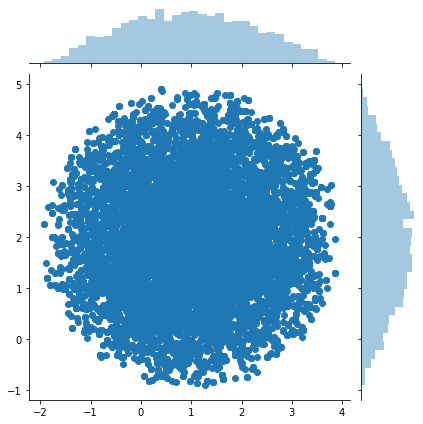

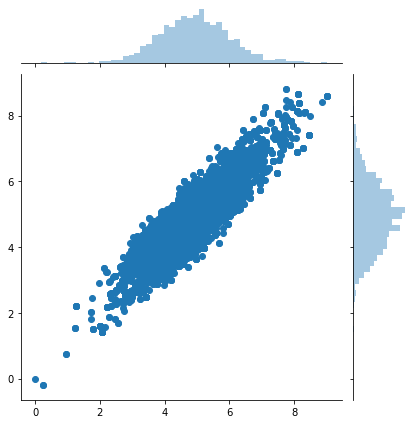

In [7]:
import numpy as np
import scipy.stats as st
import seaborn as sns


mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])


def circle(x, y):
    return (x-1)**2 + (y-2)**2 - 3**2


def pgauss(x, y):
    return st.multivariate_normal.pdf([x, y], mean=mus, cov=sigmas)


def metropolis_hastings(p, iter=1000):
    x, y = 0., 0.
    samples = np.zeros((iter, 2))

    for i in range(iter):
        x_star, y_star = np.array([x, y]) + np.random.normal(size=2)
        if np.random.rand() < p(x_star, y_star) / p(x, y):
            x, y = x_star, y_star
        samples[i] = np.array([x, y])

    return samples


if __name__ == '__main__':
    samples = metropolis_hastings(circle, iter=10000)
    sns.jointplot(samples[:, 0], samples[:, 1])

    samples = metropolis_hastings(pgauss, iter=10000)
    sns.jointplot(samples[:, 0], samples[:, 1])